<a href="https://colab.research.google.com/github/Code-With-Aagam/Evaluation-and-implementation-of-various-bayesian-approches-to-future-climate-change-prediction/blob/main/Major_Project_Climate_Change_Prediction_and_Assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import bs4
from bs4 import BeautifulSoup
import csv
import requests
import time
import pandas as pd
import urllib
import re
import pickle
from datetime import datetime

In [ ]:
url = 'http://www.estesparkweather.net/archive_reports.php?date=200901'
page = requests.get(url)
print(page)
soup =  BeautifulSoup(page.content,'html.parser')
print(soup)

<Response [200]>
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">

<html xmlns="http://www.w3.org/1999/xhtml">
<!-- DW6 -->
<head>
<!-- Copyright 2005 Macromedia, Inc. All rights reserved. -->
<meta content="300" http-equiv="Refresh"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="no-cache" http-equiv="Cache-Control"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="37.27465, -122.02295" name="ICBM"/>
<meta content="Estes Park, Colorado Weather Station" name="DC.title"/>
<meta content="Gregory Truta" name="author"/>
<meta content="© 2007 EstesParkWeather.net" name="copyright"/>
<meta content="weather, Weather, temperature, dew point, humidity, forecast, Davis Vantage Pro, Estes Park Colorado Weather, Colorado Weather, CO Weather, weather conditions, live weather, live weather conditions, weather data, weather history, WeatherLink, Weather-Display" name="Keywords"/>
<meta con

In [ ]:
Dates_r = pd.date_range(start='1/1/2009', end='01/12/2022', freq='M')
dates = [str(i)[:4] + str(i)[5:7] for i in Dates_r]
df_list = []
index = []

    
for k in range(len(dates)):
    url = "http://www.estesparkweather.net/archive_reports.php?date="
    url += dates[k]
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    table = soup.find_all('table')
    raw_data = [row.text.splitlines() for row in table]
    raw_data = raw_data[:-9]
    for i in range(len(raw_data)):
        raw_data[i] = raw_data[i][2:len(raw_data[i]):3]
    for i in range(len(raw_data)):
        try:
            c = ['.'.join(re.findall("\d+", str(raw_data[i][j].split()[:5]))) for j in range(len(raw_data[i]))]
            df_list.append(c)
            index.append(dates[k] + c[0])
        except:
            pass

f_index = [index[i] for i in range(len(index)) if len(index[i]) > 6]
data = [df_list[i][1:] for i in range(len(df_list)) if len(df_list[i][1:]) == 19]

final_index = [datetime.strptime(str(f_index[i]), '%Y%m%d').strftime('%Y-%m-%d') for i in range(len(f_index))]


In [ ]:
for k in range(len(dates)):
    url = "http://www.estesparkweather.net/archive_reports.php?date="
    url += dates[k]
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    table = soup.find_all('table')
    raw_data = [row.text.splitlines() for row in table]
    raw_data = raw_data[:-9]
    for i in range(len(raw_data)):
        raw_data[i] = raw_data[i][2:len(raw_data[i]):3]
    for i in range(len(raw_data)):
        try:
            c = ['.'.join(re.findall("\d+", str(raw_data[i][j].split()[:5]))) for j in range(len(raw_data[i]))]
            df_list.append(c)
            index.append(dates[k] + c[0])
        except:
            pass

In [ ]:
f_index = [index[i] for i in range(len(index)) if len(index[i]) > 6]
data = [df_list[i][1:] for i in range(len(df_list)) if len(df_list[i][1:]) == 19]

final_index = [datetime.strptime(str(f_index[i]), '%Y%m%d').strftime('%Y-%m-%d') for i in range(len(f_index))]

In [ ]:
from datetime import datetime
final_index = [datetime.strptime(str(f_index[i]), '%Y%m%d').strftime('%Y-%m-%d') for i in range(len(f_index))]


In [ ]:
import pandas as pd
import numpy as np

col = ['Average temperature', 'Average humidity',
       'Average dewpoint', 'Average barometer',
       'Average windspeed', 'Average gustspeed',
       'Average direction', 'Rainfall for month',
       'Rainfall for year', 'Maximum rain per minute',
       'Maximum temperature', 'Minimum temperature',
       'Maximum humidity', 'Minimum humidity', 'Maximum pressure',
       'Minimum pressure', 'Maximum windspeed',
'Maximum gust speed', 'Maximum heat index']
df = pd.DataFrame(data, columns = col, index = final_index)
df.head()

,Average temperature,Average humidity,Average dewpoint,Average barometer,Average windspeed,Average gustspeed,Average direction,Rainfall for month,Rainfall for year,Maximum rain per minute,Maximum temperature,Minimum temperature,Maximum humidity,Minimum humidity,Maximum pressure,Minimum pressure,Maximum windspeed,Maximum gust speed,Maximum heat index
2009-01-01,37.8,35,12.7,29.7,26.4,36.8,274,0.00,0.00,0.00,40.1,34.5,44,27,29.762,29.596,41.4,59,40.1
2009-01-02,43.2,32,14.7,29.5,12.8,18.0,240,0.00,0.00,0.00,52.8,37.5,43,16,29.669,29.268,35.7,51,52.8
2009-01-03,25.7,60,12.7,29.7,8.3,12.2,290,0.00,0.00,0.00,41.2,6.7,89,35,30.232,29.260,25.3,38,41.2
2009-01-04,9.3,67,0.1,30.4,2.9,4.5,47,0.00,0.00,0.00,19.4,0.0,79,35,30.566,30.227,12.7,20,32.0
2009-01-05,23.5,30,5.3,29.9,16.7,23.1,265,0.00,0.00,0.00,30.3,15.1,56,13,30.233,29.568,38.0,53,32.0


In [ ]:
df

,Average temperature,Average humidity,Average dewpoint,Average barometer,Average windspeed,Average gustspeed,Average direction,Rainfall for month,Rainfall for year,Maximum rain per minute,Maximum temperature,Minimum temperature,Maximum humidity,Minimum humidity,Maximum pressure,Minimum pressure,Maximum windspeed,Maximum gust speed,Maximum heat index
2009-01-01,37.8,35,12.7,29.7,26.4,36.8,274,0.00,0.00,0.00,40.1,34.5,44,27,29.762,29.596,41.4,59,40.1
2009-01-02,43.2,32,14.7,29.5,12.8,18.0,240,0.00,0.00,0.00,52.8,37.5,43,16,29.669,29.268,35.7,51,52.8
2009-01-03,25.7,60,12.7,29.7,8.3,12.2,290,0.00,0.00,0.00,41.2,6.7,89,35,30.232,29.260,25.3,38,41.2
2009-01-04,9.3,67,0.1,30.4,2.9,4.5,47,0.00,0.00,0.00,19.4,0.0,79,35,30.566,30.227,12.7,20,32.0
2009-01-05,23.5,30,5.3,29.9,16.7,23.1,265,0.00,0.00,0.00,30.3,15.1,56,13,30.233,29.568,38.0,53,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,22.7,76,15.9,29.6,2.8,4.5,242,0.50,1.04,0.00,29.2,17.0,90,53,29.751,29.325,18.4,31.1,29.2
2021-12-28,21.0,54,6.5,29.4,9.8,14.4,208,0.50,1.04,0.00,25.2,14.5,79,42,29.569,29.315,26.5,41.4,25.2
2021-12-29,23.5,57,10.4,29.7,8.3,12.1,234,0.50,1.04,0.00,24.4,14.5,75,50,29.758,29.568,17.3,31.1,24.4
2021-12-30,26.3,59,13.4,29.5,16.0,23.1,241,0.50,1.04,0.00,30.6,21.4,87,42,29.682,29.427,34.5,52.9,30.6


In [ ]:
df.shape

(8772, 19)

In [ ]:
df.describe()

,Average temperature,Average humidity,Average dewpoint,Average barometer,Average windspeed,Average gustspeed,Average direction,Rainfall for month,Rainfall for year,Maximum rain per minute,Maximum temperature,Minimum temperature,Maximum humidity,Minimum humidity,Maximum pressure,Minimum pressure,Maximum windspeed,Maximum gust speed,Maximum heat index
count,8772,8772,8772,8772,8772,8772,8772,8772,8772,8772,8772,8772,8772,8772,8772,8772,8772,8772,8772
unique,661,86,532,22,208,334,334,242,856,18,708,553,84,89,1073,1088,63,107,651
top,61.0,51,15.7,29.8,2.3,3.9,282,0.00,0.00,0.00,78.1,27.0,92,27,29.942,29.751,17.3,26.5,79.1
freq,40,214,40,1604,194,134,474,1250,252,6076,46,60,434,380,32,32,610,656,170


In [ ]:
df['Average temperature'].value_counts()

61.0    40
40.9    36
60.4    36
46.9    36
61.2    36
        ..
8.4      2
9.3      2
3.3      2
6.5      2
69.2     2
Name: Average temperature, Length: 661, dtype: int64

In [ ]:
df.isnull().sum()

Average temperature        0
Average humidity           0
Average dewpoint           0
Average barometer          0
Average windspeed          0
Average gustspeed          0
Average direction          0
Rainfall for month         0
Rainfall for year          0
Maximum rain per minute    0
Maximum temperature        0
Minimum temperature        0
Maximum humidity           0
Minimum humidity           0
Maximum pressure           0
Minimum pressure           0
Maximum windspeed          0
Maximum gust speed         0
Maximum heat index         0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print(len(df['Average temperature']))

8772


In [ ]:
col = ['Average temperature', 'Average humidity', 'Average dewpoint', 'Average barometer', 'Average windspeed', 'Average gustspeed', 'Average direction', 'Rainfall for month', 'Rainfall for year', 'Maximum rain per minute', 'Maximum temperature', 'Minimum temperature', 'Maximum humidity', 'Minimum humidity', 'Maximum pressure', 'Minimum pressure', 'Maximum windspeed', 'Maximum gust speed', 'Maximum heat index']

print(col)

['Average temperature', 'Average humidity', 'Average dewpoint', 'Average barometer', 'Average windspeed', 'Average gustspeed', 'Average direction', 'Rainfall for month', 'Rainfall for year', 'Maximum rain per minute', 'Maximum temperature', 'Minimum temperature', 'Maximum humidity', 'Minimum humidity', 'Maximum pressure', 'Minimum pressure', 'Maximum windspeed', 'Maximum gust speed', 'Maximum heat index']


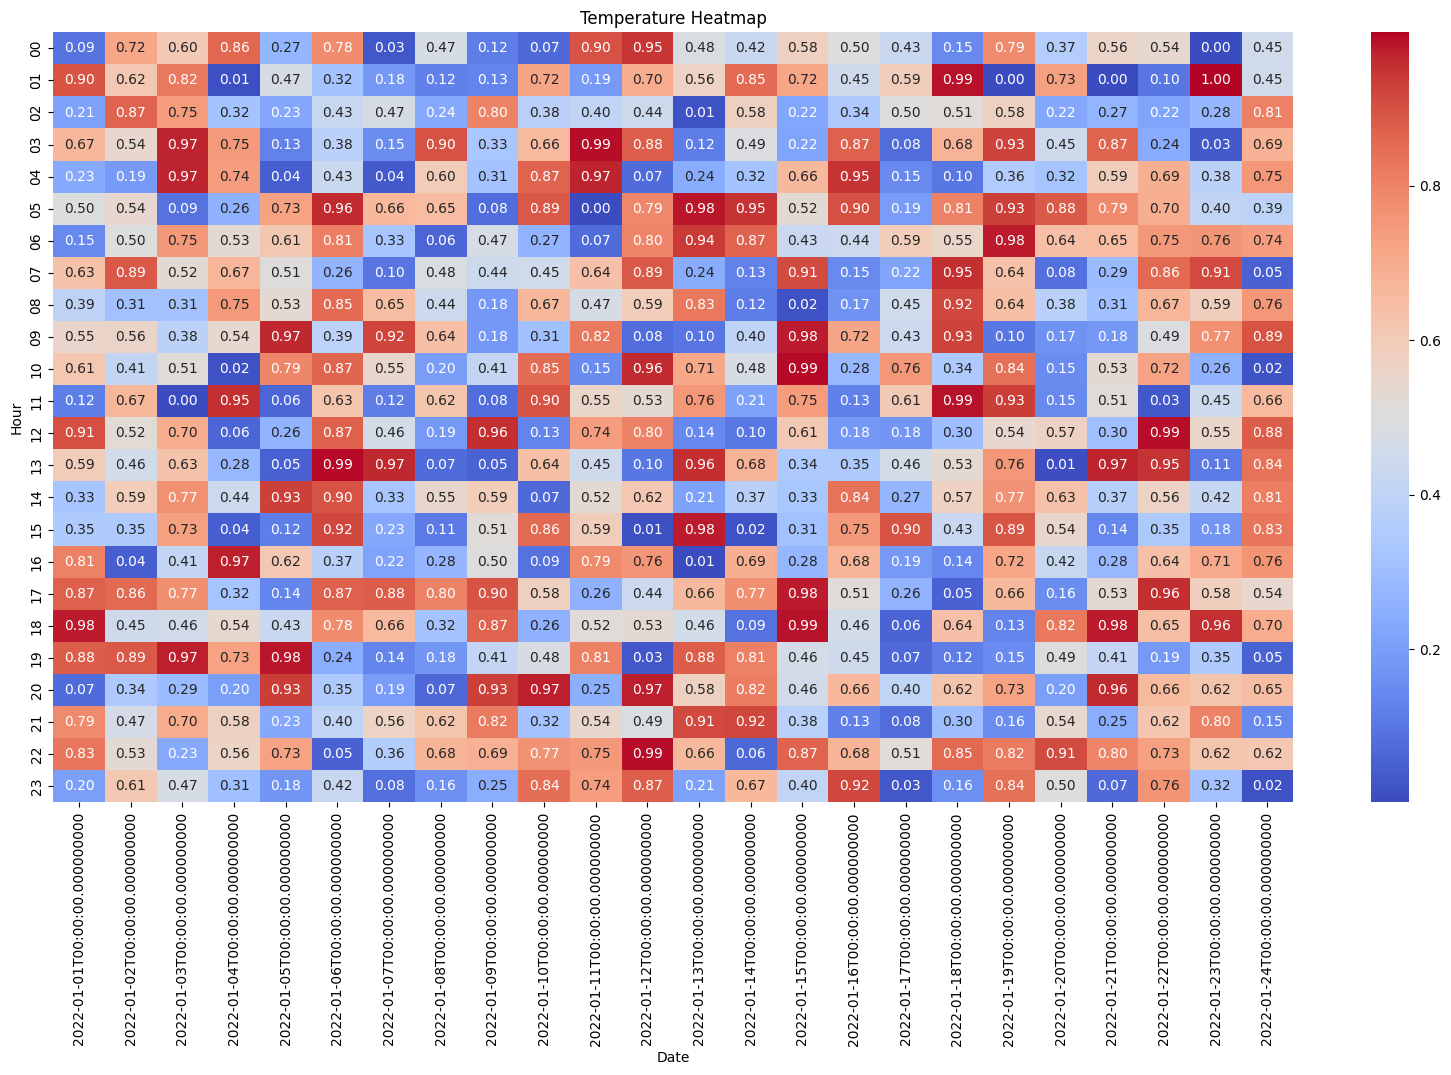

In [ ]:
dates = pd.date_range('20220101', periods=24)
hours = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
data = np.random.rand(24, 24)
df = pd.DataFrame(data, index=hours, columns=dates)

# Plot heatmap
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df, cmap='coolwarm', annot=True, fmt='.2f', ax=ax)
plt.title('Temperature Heatmap')
plt.xlabel('Date')
plt.ylabel('Hour')
plt.show()

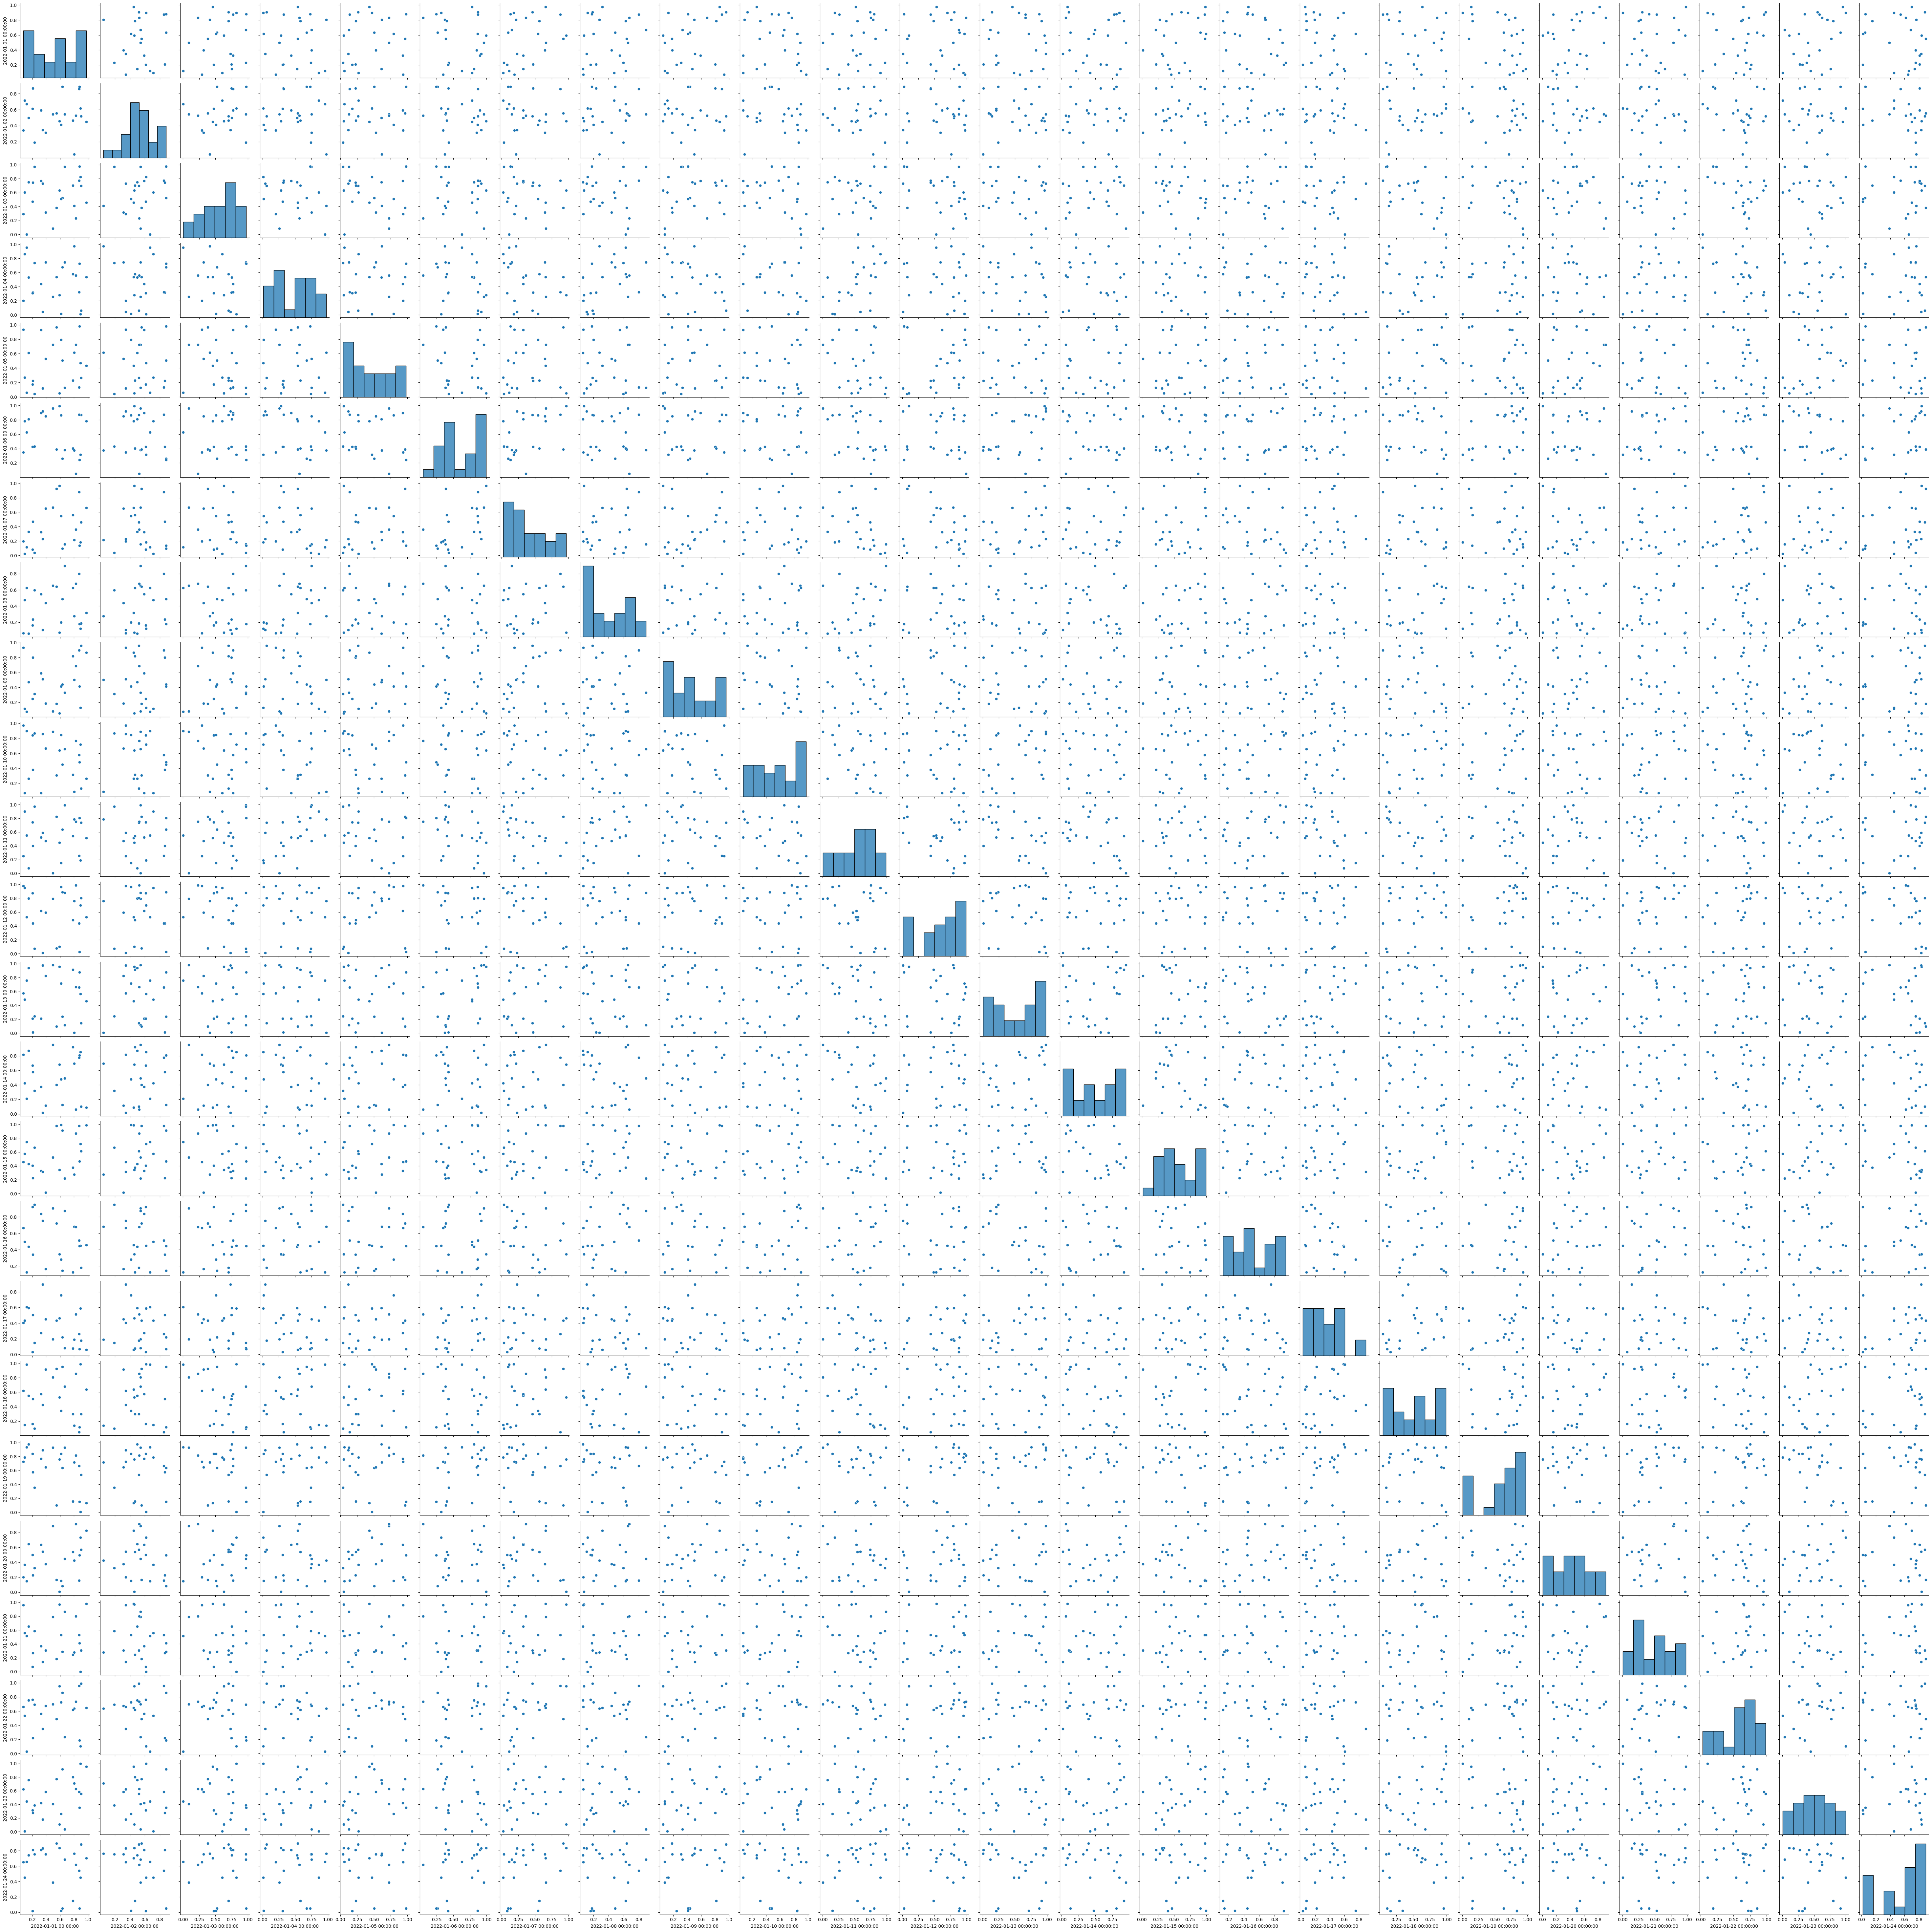

In [ ]:
sns.pairplot(df)

# Spltting Data

In [ ]:
# Set the size of the validation set
val_size = 0.2

# Calculate the split index
split_idx = int(len(df) * (1 - val_size))

# Split the data into training and validation sets
train_data = df.iloc[:split_idx, :]
val_data = df.iloc[split_idx:, :]

# Normalizing the Data

In [ ]:
# Calculate the means and standard deviations of the input features
input_means = train_data.iloc[:, 1:].mean(axis=0)
input_stds = train_data.iloc[:, 1:].std(axis=0)

# Normalize the input features in the training and validation sets
train_data.iloc[:, 1:] = (train_data.iloc[:, 1:] - input_means) / input_stds
val_data.iloc[:, 1:] = (val_data.iloc[:, 1:] - input_means) / input_stds

In [ ]:
!pip install pymc3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.2/872.2 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 58.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of arviz to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.6 MB/s eta 0:00:00

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_probability as tfp
tfd = tfp.distributions

# define a custom layer to perform variational inference
class DenseFlipout(tf.keras.layers.Dense):
    def __init__(self, units, activation=None, prior_std=1.0, **kwargs):
        super().__init__(units, activation=activation, **kwargs)
        self.prior_std = prior_std

    def build(self, input_shape):
        super().build(input_shape)
        kernel_shape = self.kernel.shape
        self.kernel_posterior = self.add_weight(name='kernel_posterior',
                                                 shape=kernel_shape,
                                                 initializer='random_normal',
                                                 trainable=True)

    def call(self, inputs):
        kernel = self.kernel
        if self.trainable:
            kernel = tfp.distributions.Normal(self.kernel_posterior, 1.0).sample()
        return tf.matmul(inputs, kernel)

    def log_prior(self):
        return tf.reduce_sum(tfd.Normal(0, self.prior_std).log_prob(self.kernel)) \
               + tf.reduce_sum(tfd.Normal(0, self.prior_std).log_prob(self.bias))

    def log_posterior(self):
        return tf.reduce_sum(tfd.Normal(self.kernel_posterior, 1.0).log_prob(self.kernel)) \
               + tf.reduce_sum(tfd.Normal(self.bias, 1.0).log_prob(self.bias))

# define the Bayesian neural network model
class BayesianNeuralNetwork(tf.keras.Model):
    def __init__(self, units=[16, 16, 1], prior_std=1.0):
        super().__init__()
        self.units = units
        self.prior_std = prior_std
        self.hidden_layer_1 = DenseFlipout(units[0], activation=tf.nn.relu, prior_std=self.prior_std)
        self.hidden_layer_2 = DenseFlipout(units[1], activation=tf.nn.relu, prior_std=self.prior_std)
        self.output_layer = DenseFlipout(units[2], prior_std=self.prior_std)

    def call(self, inputs):
        x = self.hidden_layer_1(inputs)
        x = self.hidden_layer_2(x)
        x = self.output_layer(x)
        return x

    def log_prior(self):
        return self.hidden_layer_1.log_prior() + self.hidden_layer_2.log_prior() + self.output_layer.log_prior()

    def log_posterior(self):
        return self.hidden_layer_1.log_posterior() + self.hidden_layer_2.log_posterior() + self.output_layer.log_posterior()

    def sample_elbo(self, inputs, labels, num_samples):
        outputs = tf.stack([self(inputs) for _ in range(num_samples)])
        log_likelihood = tf.reduce_sum(tfd.Normal(outputs, 1.0).log_prob(labels), axis=2)
        log_prior = self.log_prior()
        log_posterior = self.log_posterior()
        kl = log_posterior - log_prior
        elbo = tf.reduce_mean(log_likelihood - kl / num_samples)
        return elbo


# normalize the dataset
df = (df - df.mean()) / df.std()

# create the Bayesian neural network model
model = BayesianNeuralNetwork()

# define the optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
df = (df - df.mean()) / df.std()
df


,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,...,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23,2022-01-24
00,-1.442113,0.832368,0.097763,1.304741,-0.575697,0.668090,-1.252124,0.312370,-1.140674,-1.583140,...,0.063698,-0.088391,0.340797,-1.192579,0.549475,-0.252667,0.247443,-0.185639,-1.747216,-0.379951
01,1.222081,0.365631,0.921614,-1.579644,0.051789,-0.985503,-0.704682,-1.055705,-1.094313,0.590627,...,0.557445,-0.261908,0.995540,1.454967,-2.026046,1.164681,-1.645405,-1.789454,1.743833,-0.370293
02,-1.054094,1.546740,0.629859,-0.536869,-0.712566,-0.601872,0.293526,-0.617301,1.144083,-0.542151,...,-1.176836,-0.652716,0.644945,-0.054798,-0.144577,-0.797387,-0.729607,-1.360912,-0.793476,0.825615
03,0.469212,0.026847,1.471287,0.918674,-1.019971,-0.758841,-0.805554,1.961672,-0.428429,0.386454,...,-1.193765,1.288607,-1.140593,0.489903,1.016459,0.058689,1.306992,-1.295968,-1.643333,0.417250
04,-0.979994,-1.630024,1.466631,0.889923,-1.287357,-0.583296,-1.214142,0.791977,-0.482557,1.084828,...,0.365613,1.568138,-0.859178,-1.345450,-0.871033,-0.413180,0.357509,0.390161,-0.415547,0.644776
05,-0.100770,0.017075,-1.821845,-0.736349,0.843009,1.295950,0.962941,1.016835,-1.268281,1.153247,...,-0.120128,1.404301,-0.658270,0.888736,1.026536,1.751425,1.041141,0.409780,-0.342159,-0.586373
06,-1.261461,-0.192762,0.646862,0.183059,0.481340,0.759308,-0.207647,-1.291802,0.045803,-0.928160,...,-0.458318,-0.303870,1.017527,0.090509,1.179897,0.818904,0.581753,0.619164,0.900220,0.602785
07,0.352989,1.635541,-0.193971,0.674491,0.156722,-1.178356,-0.999992,0.355454,-0.069369,-0.306279,...,1.232066,-1.372968,-0.554551,1.352551,0.052206,-1.344538,-0.666644,1.008608,1.446419,-1.727939
08,-0.439211,-1.053713,-0.975850,0.917313,0.233588,0.913222,0.913760,0.175134,-0.915492,0.419582,...,-1.898642,-1.296090,0.428210,1.236926,0.082777,-0.207037,-0.606568,0.320028,0.292804,0.648129
09,0.072813,0.090785,-0.719098,0.211228,1.586594,-0.732153,1.862733,0.964615,-0.923957,-0.786395,...,1.472370,0.738412,0.351269,1.264970,-1.707477,-1.025308,-1.026108,-0.352672,0.937194,1.116311


In [ ]:
model = BayesianNeuralNetwork()

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
# compile the model
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])


In [ ]:
# select the first column as the target variable
y = df.iloc[:, 0]

# select all columns except the first as the input features
X = df.iloc[:, 1:]

# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100


1/1 [==============================] - 1s 1s/step - loss: 4769.7515 - mae: 55.1475 - val_loss: 3842.1699 - val_mae: 55.9281
Epoch 2/100
1/1 [==============================] - 0s 55ms/step - loss: 2947.7151 - mae: 46.2868 - val_loss: 1977.4210 - val_mae: 37.0580
Epoch 3/100
1/1 [==============================] - 0s 37ms/step - loss: 5126.6138 - mae: 64.5890 - val_loss: 3363.3040 - val_mae: 47.9991
Epoch 4/100
1/1 [==============================] - 0s 36ms/step - loss: 4132.9229 - mae: 45.9059 - val_loss: 2894.1167 - val_mae: 48.7942
Epoch 5/100
1/1 [==============================] - 0s 39ms/step - loss: 10207.2686 - mae: 88.8078 - val_loss: 9524.5088 - val_mae: 83.0667
Epoch 6/100
1/1 [==============================] - 0s 39ms/step - loss: 4349.8921 - mae: 57.4303 - val_loss: 1620.8030 - val_mae: 32.8667
Epoch 7/100
1/1 [==============================] - 0s 37ms/step - loss: 2699.2463 - mae: 41.3624 - val_loss: 4932.7607 - val_mae: 52.5557
Epoch 8/100
1/1 [==============================

In [ ]:
# compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'accuracy'])

# train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100


1/1 [==============================] - 2s 2s/step - loss: 6689.6279 - mse: 6689.6279 - mae: 64.9000 - accuracy: 0.0000e+00 - val_loss: 676.1680 - val_mse: 676.1680 - val_mae: 19.2491 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 76ms/step - loss: 3821.4795 - mse: 3821.4795 - mae: 49.6971 - accuracy: 0.0000e+00 - val_loss: 8849.2021 - val_mse: 8849.2021 - val_mae: 76.0241 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 88ms/step - loss: 11705.0625 - mse: 11705.0625 - mae: 92.6749 - accuracy: 0.0000e+00 - val_loss: 12276.7637 - val_mse: 12276.7637 - val_mae: 76.0762 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 67ms/step - loss: 1355.4412 - mse: 1355.4412 - mae: 29.7632 - accuracy: 0.0000e+00 - val_loss: 1559.3687 - val_mse: 1559.3687 - val_mae: 29.2069 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 76ms/step - loss: 4261.7314 - mse: 4261.7314 - mae: 54

In [ ]:
print(model.summary())

Model: "bayesian_neural_network_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_flipout_3 (DenseFlipo  multiple                 752       
 ut)                                                             
                                                                 
 dense_flipout_4 (DenseFlipo  multiple                 528       
 ut)                                                             
                                                                 
 dense_flipout_5 (DenseFlipo  multiple                 33        
 ut)                                                             
                                                                 
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________
None


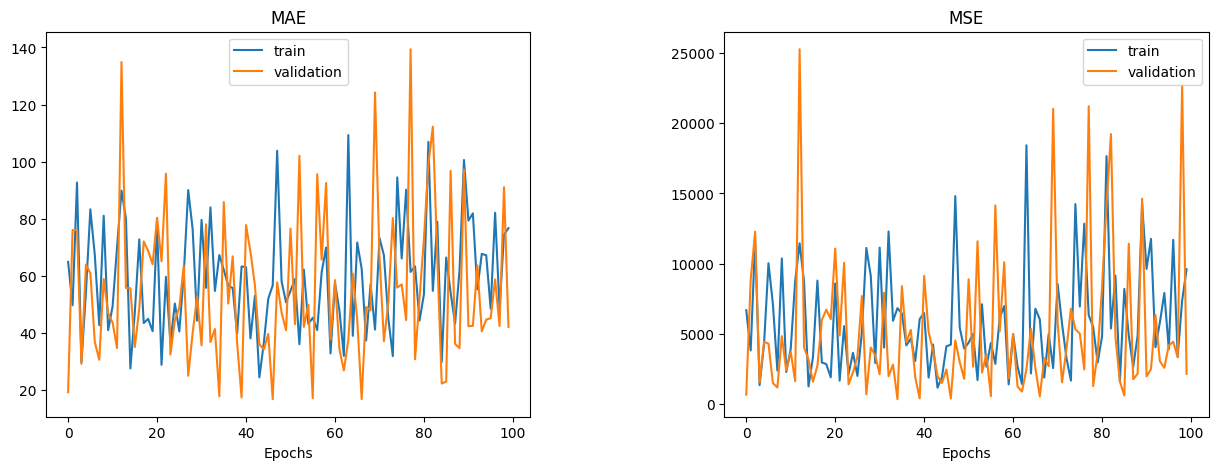

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(history.history['mae'], label='train')
ax1.plot(history.history['val_mae'], label='validation')
ax1.set_title('MAE')
ax1.set_xlabel('Epochs')
ax1.legend()

ax2.plot(history.history['mse'], label='train')
ax2.plot(history.history['val_mse'], label='validation')
ax2.set_title('MSE')
ax2.set_xlabel('Epochs')
ax2.legend()

plt.subplots_adjust(wspace=0.4)

plt.show()


In [ ]:
# define a custom layer to perform variational inference
class DenseFlipout(tf.keras.layers.Dense):
    def __init__(self, units, activation=None, prior_std=1.0, **kwargs):
        super().__init__(units, activation=activation, **kwargs)
        self.prior_std = prior_std

    def build(self, input_shape):
        super().build(input_shape)
        kernel_shape = self.kernel.shape
        self.kernel_posterior = self.add_weight(name='kernel_posterior',
                                                 shape=kernel_shape,
                                                 initializer='random_normal',
                                                 trainable=True)

    def call(self, inputs):
        kernel = self.kernel
        if self.trainable:
            kernel = tfp.distributions.Normal(self.kernel_posterior, 1.0).sample()
        return tf.matmul(inputs, kernel)

    def log_prior(self):
        return tf.reduce_sum(tfd.Normal(0, self.prior_std).log_prob(self.kernel)) \
               + tf.reduce_sum(tfd.Normal(0, self.prior_std).log_prob(self.bias))

    def log_posterior(self):
        return tf.reduce_sum(tfd.Normal(self.kernel_posterior, 1.0).log_prob(self.kernel)) \
               + tf.reduce_sum(tfd.Normal(self.bias, 1.0).log_prob(self.bias))

# define the Bayesian neural network model
class BayesianNeuralNetwork(tf.keras.Model):
    def __init__(self, units=[16, 16, 1], prior_std=1.0):
        super().__init__()
        self.units = units
        self.prior_std = prior_std
        self.hidden_layer_1 = DenseFlipout(units[0], activation=tf.nn.relu, prior_std=self.prior_std)
        self.hidden_layer_2 = DenseFlipout(units[1], activation=tf.nn.relu, prior_std=self.prior_std)
        self.output_layer = DenseFlipout(units[2], prior_std=self.prior_std)

    def call(self, inputs):
        x = self.hidden_layer_1(inputs)
        x = self.hidden_layer_2(x)
        x = self.output_layer(x)

In [ ]:
model = BayesianNeuralNetwork()
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
              loss=tf.losses.MeanSquaredError())

In [ ]:
# extract the training inputs and targets
x_train = train_data.drop(columns=['2022-01-01']).values
y_train = train_data['2022-01-01'].values

In [ ]:
# split the data into training and validation sets
train_ratio = 0.8
train_size = int(train_ratio * len(df))
train_data = df[:train_size]
val_data = df[train_size:]

# extract the training inputs and targets
x_train = train_data.drop(columns=['2022-01-01']).values
y_train = train_data['2022-01-01'].values

# extract the validation inputs and targets
x_val = val_data.drop(columns=['2022-01-01']).values
y_val = val_data['2022-01-01'].values

# extract the test inputs and targets
x_test = val_data.drop(columns=['2022-01-01']).values
y_test = val_data['2022-01-01'].values


In [ ]:
train_data.isnull().sum()
train_data.fillna(method='ffill', inplace=True)


Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.8623 - val_loss: 1.3213
Epoch 2/100
1/1 [==============================] - 0s 72ms/step - loss: 0.8582 - val_loss: 1.3301
Epoch 3/100
1/1 [==============================] - 0s 80ms/step - loss: 0.8540 - val_loss: 1.3389
Epoch 4/100
1/1 [==============================] - 0s 127ms/step - loss: 0.8500 - val_loss: 1.3477
Epoch 5/100
1/1 [==============================] - 0s 114ms/step - loss: 0.8461 - val_loss: 1.3568
Epoch 6/100
1/1 [==============================] - 0s 113ms/step - loss: 0.8422 - val_loss: 1.3664
Epoch 7/100
1/1 [==============================] - 0s 163ms/step - loss: 0.8384 - val_loss: 1.3764
Epoch 8/100
1/1 [==============================] - 0s 63ms/step - loss: 0.8346 - val_loss: 1.3870
Epoch 9/100
1/1 [==============================] - 0s 65ms/step - loss: 0.8307 - val_loss: 1.3982
Epoch 10/100
1/1 [==============================] - 0s 72ms/step - loss: 0.8270 - val_loss: 1.4099
Epoch 11/100
1/1 

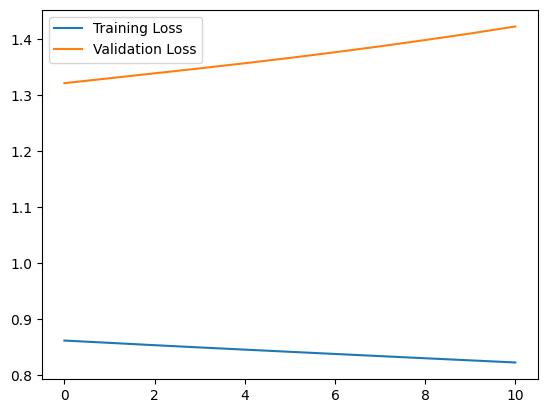

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

# define the model
model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# set up early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

# train the model
history = model.fit(x_train.reshape((x_train.shape[0], x_train.shape[1], 1)), y_train, epochs=100, batch_size=32, validation_data=(x_val.reshape((x_val.shape[0], x_val.shape[1], 1)), y_val), callbacks=[early_stop])

# plot the training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()



In [ ]:
# make predictions on the test set
y_pred = model.predict(x_test.reshape((x_test.shape[0], x_test.shape[1], 1)))

# evaluate the model on the test set
mse = model.evaluate(x_test.reshape((x_test.shape[0], x_test.shape[1], 1)), y_test)

# print the mean squared error
print("Mean Squared Error on Test Set: ", mse)

1/1 [==============================] - 0s 36ms/step - loss: 1.3213
Mean Squared Error on Test Set:  1.321310043334961


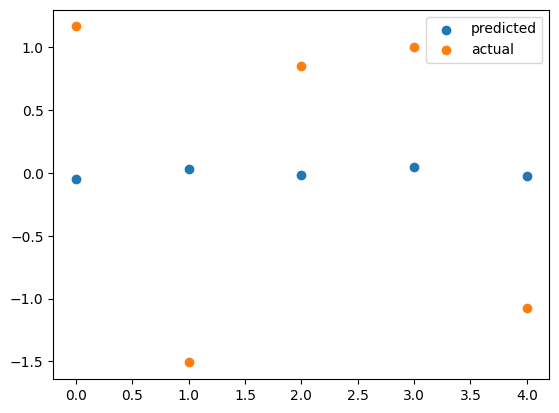

In [ ]:

# plot the predicted values in blue
plt.scatter(range(len(y_test)), y_pred, label='predicted')

# plot the actual values in red
plt.scatter(range(len(y_test)), y_test, label='actual')

plt.legend()
plt.show()
